# Assignment4 (Homework6)

Due: **Apr. 11 23:59**

# Your information
------
*Name*: 俞嘉力 <br>
*Student ID*: 515260910007 <br>
*Assignment NO.*: hw4<br>

# The librarys you need

1. In assignment III, in principle only the following libraries are allowed: 
    * numpy
    * pandas
    * matplotlib 
    * scipy
    * re
    * pyqt
    * tk
    * os
    * sys
    * collections.defaultdict
    * flex/bison related libraries
    * copy

# Requirement

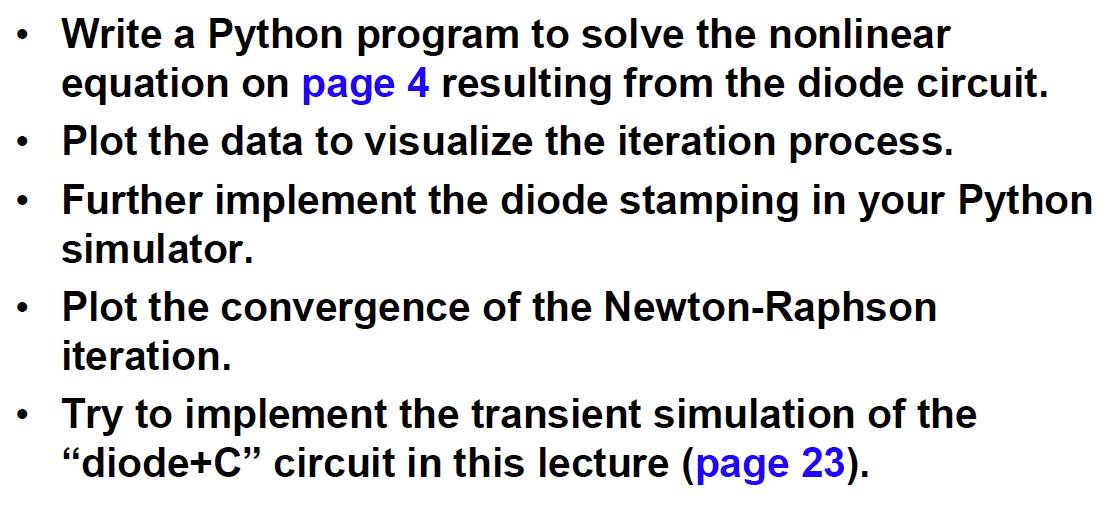

# Your Idea
------
**Describe your ideas here, how to implement this assignment, including the construction of test cases. This paragraph is included in the score. Also, it is best to have a flowchart.**

The iteration process need to iterate the circuit with N-R method, and stop on convergence. Thus, we need to set a threshold value to judge the convergence on two iteration steps; and we need to rewrite or fulfill the previous stamping function with new mode. I give a while loop for the N-R iteration, and break the loop when error is smaller than 1e-5. I add the new devies diode and mosfet.

The initial value will influence the result we obtain. If we set an inappropriate value, we may get a 'singular matrix' error, or get a nonconvergence result, or a convergence but inaccurate result, especially when we simulate the mosfet circuits. I gave a series relative reasonable initial values to the circuit and with these values, the emulator could draw the result graph accurately in some particular netlists. In practice, I will search the voltage sources and give a corresponding value to its connection points. For example, for the inverter netlist below, I will suppose that node 1 init from 2 and node 2 init from 1. Than I could get the accurate result. But if I start from all zero values, I will find a singular matrix, or if I give a random initial value, the result will be randon. I think I can use .nodeset command in further simulaion.

V1 1 0 2.0 <br />
V2 2 0 1 <br />
M1 3 2 1 1 PMOS<br />
M2 3 2 0 0 NMOS <br />

___
**Your flowchart here**
==================
![avatar](./pic/edaHW4.jpg)


# Your code & result

------
*We encourage object-oriented programming (plus points), calling your code here.
<br>You should not place all the code in jupyter, just execute the interface you wrap.*
<br>
**You are supposed to make sure that your source code and output are readable.<br> Comments in the code are required.**

result: 
 [0.         0.34176259 0.01264388]


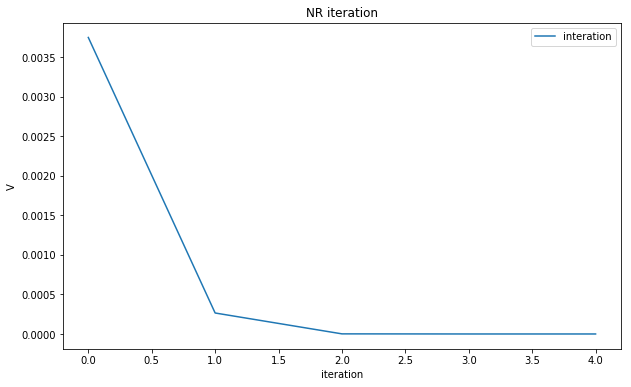

iteration 1 
 [[ 41.  -1. -40.]
 [ -1.   3.  -2.]
 [-40.  -2.  42.]]
iteration 2 
 [[ 78.06252914  -1.         -77.06252914]
 [ -1.           3.          -2.        ]
 [-77.06252914  -2.          79.06252914]]
iteration 3 
 [[ 68.03724818  -1.         -67.03724818]
 [ -1.           3.          -2.        ]
 [-67.03724818  -2.          69.03724818]]
iteration 4 
 [[ 67.33318281  -1.         -66.33318281]
 [ -1.           3.          -2.        ]
 [-66.33318281  -2.          68.33318281]]
iteration 5 
 [[ 67.32949661  -1.         -66.32949661]
 [ -1.           3.          -2.        ]
 [-66.32949661  -2.          68.32949661]]
result: 
 [0.         0.34176259 0.01264388]

The MNA stamp is the same in the PDF, and the final result 0.1264V is also the same.


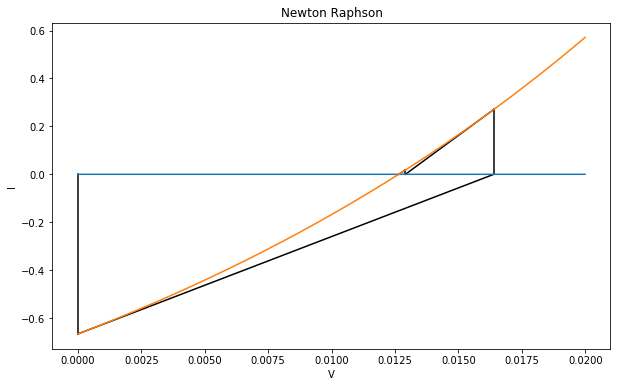

In [17]:
# *Your code here
# *Example code
# *Note that even if you tend to provide a nice GUI, the following code is also required.

from Spice import Spice 
netlist1 = '''
*netlist example 1
I1 0 1 1
R2 0 1 1
R3 1 2 0.5
D2 2 0 DMODEL
.print TRAN V(2, 0)
.end
'''
mySpice = Spice()
mySpice.parse(netlist1)
mySpice.solve()
mySpice.showIteration() 
mySpice.printMNAwithDiode(netlist1)

print('\nThe MNA stamp is the same in the PDF, and the final result 0.1264V is also the same.')

mySpice.showNewtonRaphson()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Solve the netlist below
![avatar](./pic/circuit1.jpg)

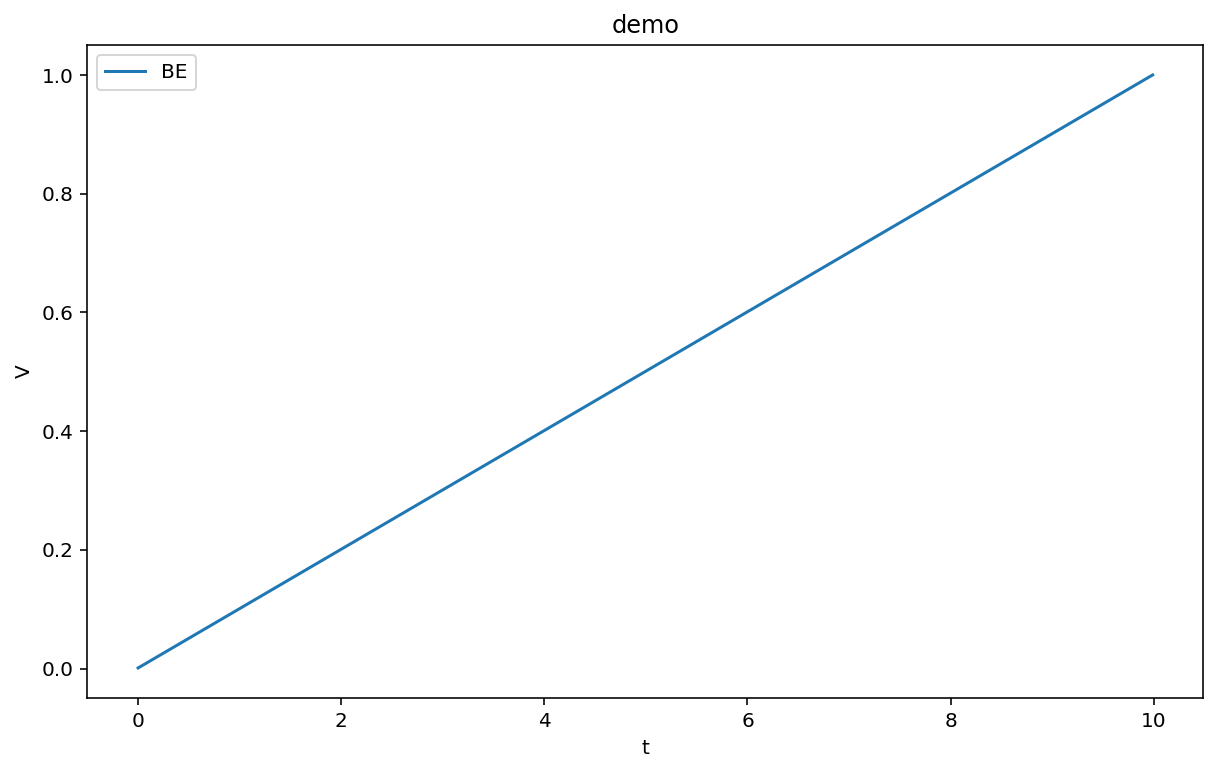

In [18]:
from Spice import Spice 
netlist2 = '''
*netlist example 1
I1 0 1 1
D2 1 2 
C3 2 0 10
.print TRAN V(2,0)
.end
'''
mySpice = Spice()
mySpice.parse(netlist2)
mySpice.solveTran(method='BE', step=0.01, stop = 1000)
mySpice.plotTranWithMatplotlib(step=0.01, stop = 1000)


commandParams {'type': 'DC', 'src1': 'V1', 'start1': 0.0, 'stop1': -1.0, 'incr1': -0.01}


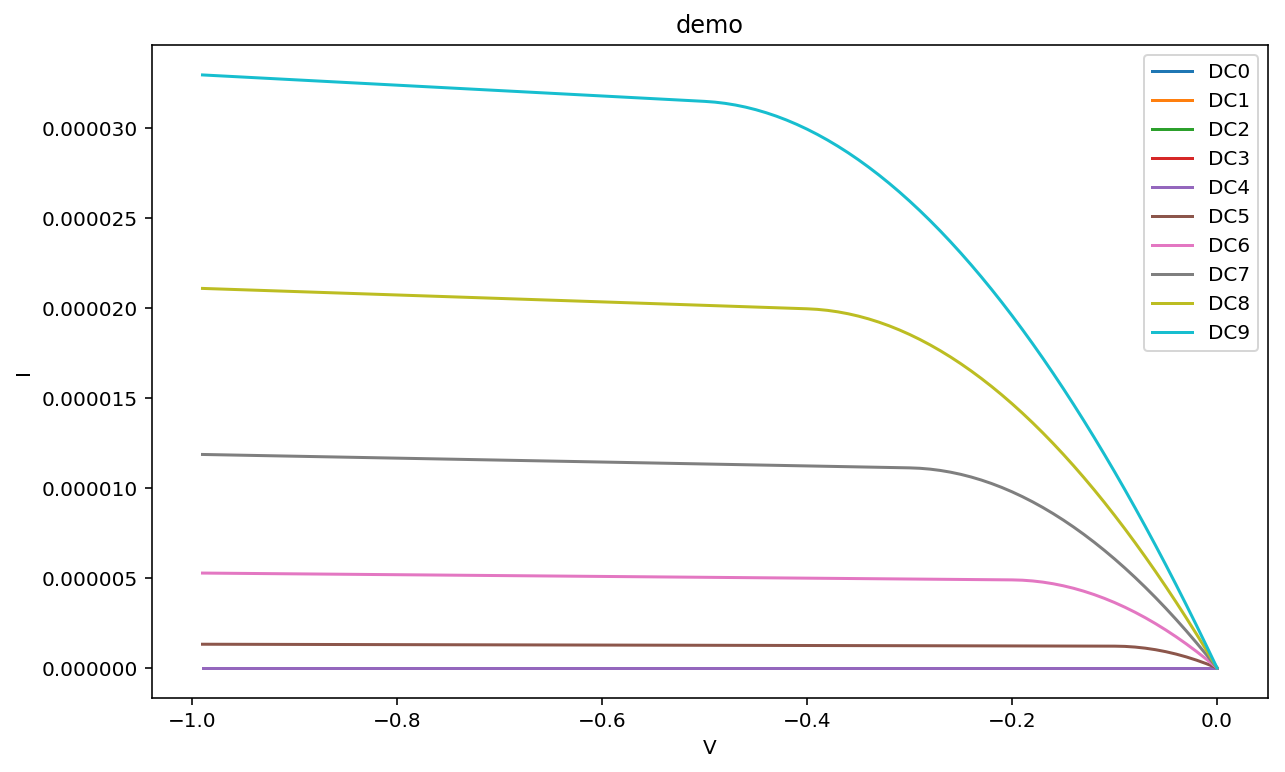

In [20]:
# simulate the mosfet
# PMOS DCT:
# Ids - Vds
netlist = """
*netlist example 1
V2 1 0 -0.7
V1 2 0 0.4
M1 2 1 0 0 PMOS

.plot DC I(V1)
.DC V1 0 -1 -0.01 V2 0 -1 -0.1
.end
"""

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, -1, -0.01)

commandParams {'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.5, 'incr1': 0.01}


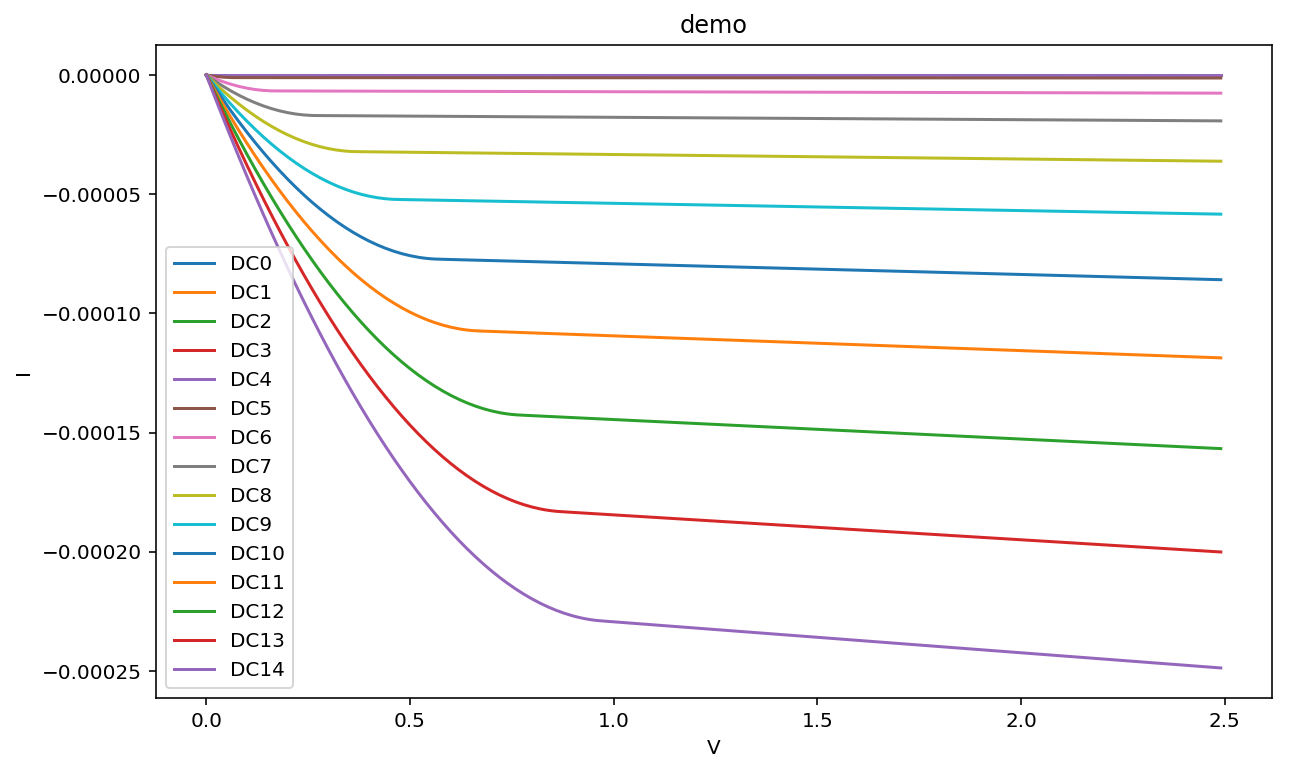

In [21]:
# simulate the mosfet
# NMOS DCT:
# Ids - Vds
netlist = """
*netlist example 1
M1 1 2 0 0 NMOS
V2 1 0 1
V1 2 0 1.5

.plot DC I(V2)
.DC V2 0 2.5 0.01 V1 0 1.5 0.1
* vds vgs
.end
"""

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, 2.5, 0.01)

commandParams {'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.0, 'incr1': 0.01}


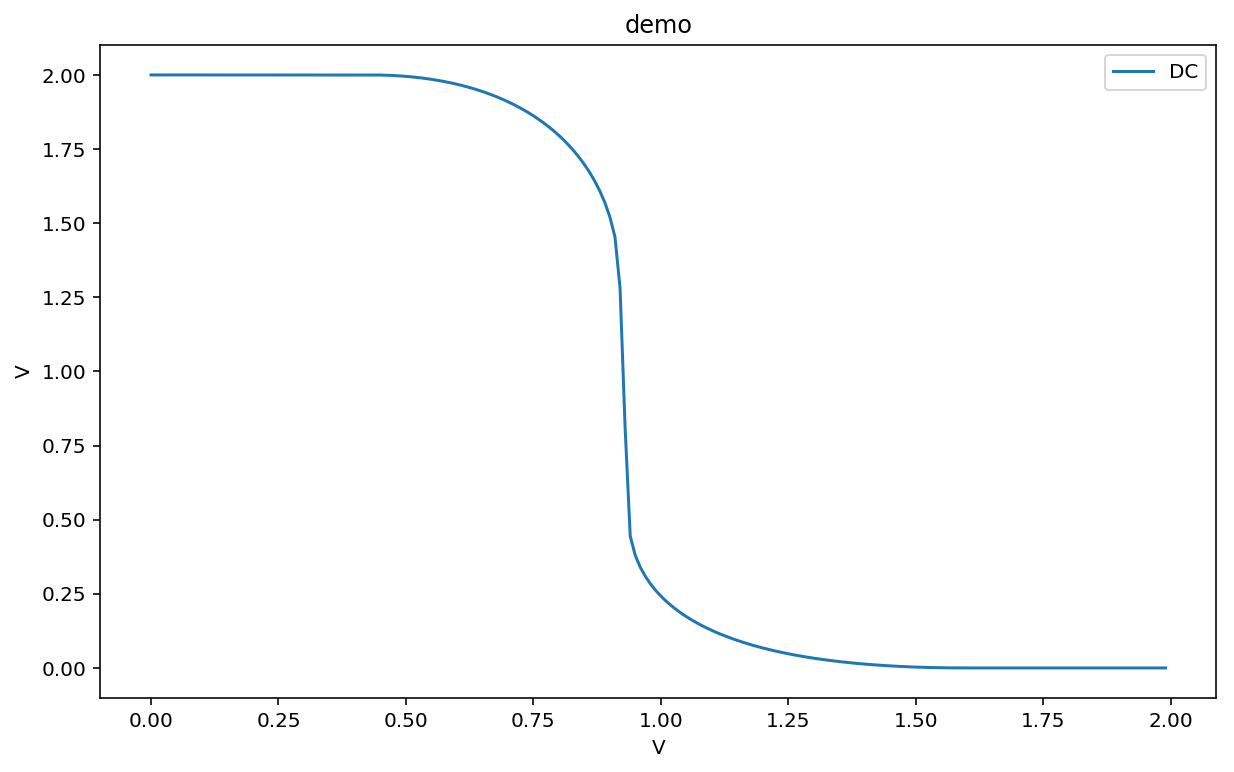

In [22]:
# inveter VTC
# Vout - Vin
netlist = """
*netlist example 1
V1 1 0 2.0
V2 2 0 1
M1 3 2 1 1 PMOS
M2 3 2 0 0 NMOS 

.plot DC V(3)
.DC V2 0 2 0.01 
.end
"""
from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, 2, 0.01)

Or use GUI....
![avatar](./pic/pyqtdemo2.jpg)

___
# Grading Policy

1. The plagiarized code is 0 points, including the plagiarized.
2. Document and flow chart score.
3. Code quality and scalability score.
4. The code, unable to reproduce the code in my environment, will lead to zero points.
5. Excessive reliance on third-party libraries will reduce points.
6. Students who can make additional graphical interfaces get proper points.
7. Late assignments are deducted by day.
8. The deadline for the assignment is **7 days after the class**. <br>For example, the assignment I is delivered in March 11, and the deadline is 23:59 on March 18.
9. The job submission address is *public.sjtu.edu.cn*, the user name is **sjtuyuhao1995**, and the password is **public**.<br> Package the **ipynb file** and your **python files**, the text files of the **test netlists**, or the extra **pdf description**, and name it ‘studentNumber_name_HWX.zip’(e.g. **51403090011_HengZhang_HW2.zip**), and finally upload it to the corresponding directory.